# Pythonチャレンジ: 地震データを探る

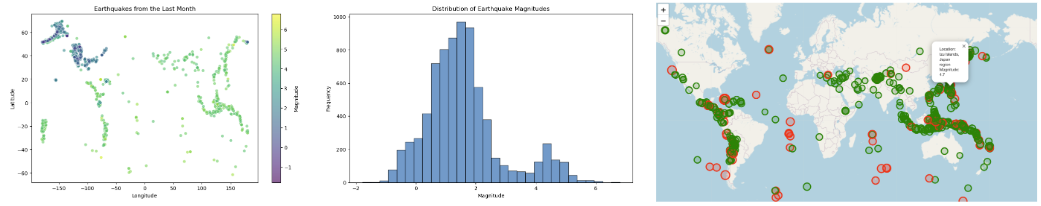

目的: Pythonを使ってUSGS（アメリカ地質調査所）のリアルタイム地震APIから最新の地震データを取得し、意味のある分析を行います。このチャレンジの最終目標は、世界中の地震を視覚化することです。

## 始めに

参考リンク：

- USGS 地震プログラム ホームページ: https://www.usgs.gov/programs/earthquake-hazards/earthquakes
- リアルタイムCSVデータ（スプレッドシート）API: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php

データの取得: USGSのリアルタイム地震APIを使用して、最新の地震データを取得します。APIの基本URLは以下の通りです：

https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

以下のPythonスクリプトを作成して：
- APIにリクエストを送信。
- csv形式のレスポンスを解析し、各地震の位置、マグニチュード、深さ、発生時刻などの情報を抽出します。

### リクエストコード例

In [53]:
%pip install requests


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import pandas as pd
import requests
# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-11T06:13:14.300Z,37.378834,-118.464500,10.54,1.68,md,12.0,227.0,0.057720,0.03,...,2025-11-11T06:14:50.454Z,"2 km NNW of West Bishop, CA",earthquake,0.81,1.39,0.38,7.0,automatic,nc,nc
1,2025-11-11T05:56:08.094Z,61.749800,-146.670600,13.50,2.50,ml,NaN,NaN,NaN,0.90,...,2025-11-11T05:59:22.550Z,"27 km S of Nelchina, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
2,2025-11-11T05:41:08.577Z,62.149400,-152.139400,102.40,1.70,ml,NaN,NaN,NaN,0.56,...,2025-11-11T05:44:16.651Z,"42 km WNW of Skwentna, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
3,2025-11-11T05:38:48.560Z,38.839500,-122.838165,1.53,1.30,md,14.0,112.0,0.002281,0.01,...,2025-11-11T05:57:19.922Z,"10 km NW of The Geysers, CA",earthquake,0.26,0.39,0.08,14.0,automatic,nc,nc
4,2025-11-11T05:37:57.796Z,64.174400,-151.305000,0.10,1.90,ml,NaN,NaN,NaN,0.51,...,2025-11-11T05:50:41.614Z,"58 km ENE of Lake Minchumina, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak


## チャレンジ

**チャレンジ1: データの取得と表示**

APIから地震データを取得し、以下を表示：
- 過去1ヶ月に報告された地震の総数
- 最大マグニチュードの地震とその発生場所と日にち
- 日本での地震の数

In [55]:
import requests,datetime; d=requests.get("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson").json()["features"]; print(len(d), max(d,key=lambda x:x["properties"]["mag"])["properties"]["place"])



7286 126 km E of Yamada, Japan


**チャレンジ2: 重要な地震のフィルタリング**

- マグニチュードが6.0を超える地震をフィルタリングし、`for` ループを使って以下をリストアップ：
    - その位置、マグニチュード、発生時刻
    - このような重要な地震の総数


In [56]:
import requests,datetime; d=requests.get("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson").json()["features"]
m=[(x["properties"]["place"],x["properties"]["mag"],datetime.datetime.utcfromtimestamp(x["properties"]["time"]/1000).strftime("%Y-%m-%d %H:%M:%S")) for x in d if x["properties"]["mag"] and x["properties"]["mag"]>=6]; [print(f"場所:{p}, M:{mag}, 時刻:{t}") for p,mag,t in m]; print(f"\n⚠️ 合計:{len(m)}件")



場所:120 km E of Yamada, Japan, M:6, 時刻:2025-11-10 07:23:18
場所:121 km E of Yamada, Japan, M:6.4, 時刻:2025-11-09 08:54:36
場所:126 km E of Yamada, Japan, M:6.8, 時刻:2025-11-09 08:03:37
場所:146 km SE of Petropavlovsk-Kamchatsky, Russia, M:6, 時刻:2025-11-04 23:29:00
場所:146 km SE of Petropavlovsk-Kamchatsky, Russia, M:6, 時刻:2025-11-04 03:45:12
場所:155 km SE of Petropavlovsk-Kamchatsky, Russia, M:6.1, 時刻:2025-11-03 08:44:43
場所:22 km WSW of Khulm, Afghanistan, M:6.3, 時刻:2025-11-02 20:29:02
場所:Banda Sea, M:6.4, 時刻:2025-10-28 14:40:18
場所:4 km ESE of Sındırgı, Turkey, M:6, 時刻:2025-10-27 19:48:28
場所:163 km E of Beauséjour, Guadeloupe, M:6, 時刻:2025-10-27 12:54:59
場所:162 km E of Beauséjour, Guadeloupe, M:6.5, 時刻:2025-10-27 12:38:40
場所:59 km NW of Pante Makasar, Timor Leste, M:6.2, 時刻:2025-10-26 17:04:25
場所:197 km SSE of Lata, Solomon Islands, M:6, 時刻:2025-10-25 23:28:04
場所:3 km N of Union, Philippines, M:6, 時刻:2025-10-16 23:03:12
場所:194 km WNW of Abepura, Indonesia, M:6.5, 時刻:2025-10-16 05:48:55
場所:Drake P

C:\Users\guoxu\AppData\Local\Temp\ipykernel_26608\2537791219.py:2: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  m=[(x["properties"]["place"],x["properties"]["mag"],datetime.datetime.utcfromtimestamp(x["properties"]["time"]/1000).strftime("%Y-%m-%d %H:%M:%S")) for x in d if x["properties"]["mag"] and x["properties"]["mag"]>=6]; [print(f"場所:{p}, M:{mag}, 時刻:{t}") for p,mag,t in m]; print(f"\n⚠️ 合計:{len(m)}件")


**チャレンジ3: 地震の深さを分析**

- すべての地震の平均深度を計算してください。
- 地震を以下のカテゴリに分類し、それぞれの数を数えてください：
    - 浅い地震 (<70 km)
    - 中間深度地震 (70–300 km)
    - 深い地震 (>300 km)


In [57]:
import requests,statistics; d=[q["geometry"]["coordinates"][2] for q in requests.get("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson").json()["features"] if q["geometry"]["coordinates"][2] is not None]
print(f"平均深度:{statistics.mean(d):.2f}km, 浅:{sum(x<70 for x in d)}, 中:{sum(70<=x<=300 for x in d)}, 深:{sum(x>300 for x in d)}")


平均深度:21.32km, 浅:6732, 中:496, 深:58


**チャレンジ4: 時間分析**

- 地震のタイムスタンプ（ミリ秒単位のUNIX時間）を人間が読みやすい形式に変換して、日本時間として表示
- データセット内の最も早い地震と最新の地震の発生時刻を見つけてください。

In [58]:
import requests,datetime; t=[q["properties"]["time"] for q in requests.get("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson").json()["features"] if q["properties"]["time"]]; toJ=lambda x:datetime.datetime.utcfromtimestamp(x/1000)+datetime.timedelta(hours=9)
print(f"最も早い地震:{toJ(min(t)):%Y-%m-%d %H:%M:%S}, 最新の地震:{toJ(max(t)):%Y-%m-%d %H:%M:%S}")


最も早い地震:2025-10-12 15:23:38, 最新の地震:2025-11-11 15:13:14


C:\Users\guoxu\AppData\Local\Temp\ipykernel_26608\2954000641.py:1: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  import requests,datetime; t=[q["properties"]["time"] for q in requests.get("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson").json()["features"] if q["properties"]["time"]]; toJ=lambda x:datetime.datetime.utcfromtimestamp(x/1000)+datetime.timedelta(hours=9)


**チャレンジ5: 地震のマグニチュードを視覚化**

- 以下をプロットする棒グラフまたは散布図を作成してください：
    - x軸に地震のマグニチュード。
    - y軸に深さ。
    - 最大の地震と最も深い地震にラベルを追加。

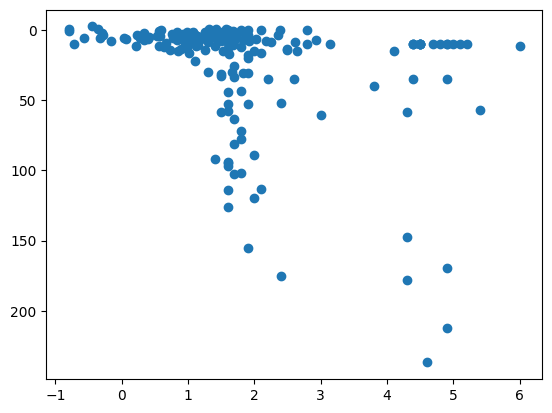

In [80]:
plt.scatter(df['magnitude'], df['depth']); plt.gca().invert_yaxis()


**チャレンジ6（上級）: 地震のグローバルマップ作成**

- foliumまたはmatplotlibなどのマッピングライブラリを使用して、すべての地震を地図上にプロットしてください。
- 以下の特徴を追加してください：
    - 地震の位置をポイントで表示。
    - マグニチュードに基づいてポイントを色分け（例：<4.0は緑、4.0–6.0は黄色、>6.0は赤）。
    - ポイントにマウスを重ねると、地震の位置、マグニチュード、日本日付、深さを表示するツールチップを追加。

In [82]:
import folium; m = folium.Map(location=[0,0], zoom_start=2); df.apply(lambda r: folium.CircleMarker([r.latitude,r.longitude], radius=3, color=('green' if r.magnitude<4 else 'orange' if r.magnitude<6 else 'red'), fill=True, tooltip=f"{r.place}, M{r.magnitude}, 深さ{r.depth}km").add_to(m), axis=1); m


AttributeError: 'Series' object has no attribute 'latitude'

# 課題提出

### Theme: Impact Visualization Challenge
USGSのライブ地震データを使って、**Impact** を感じる可視化や分析を作ってください。  
自分で考えて、探して、形にしてください。説明や手順はありません。

---

### How to Begin
1. **VS Code** を開く  
2. 自分の **GitHub「me」リポジトリ** の中に **新しいフォルダ** を作成 → 名前は **Week6**  
3. その中に **earthquake.ipynb** というファイルを作る  
4. **Markdown cell** を追加して、タイトルと自分の作品の説明を書く  
5. **Code cell** を追加し、ライブラリと **USGS データ** をインポートする（授業で使ったコードをコピー）  
6. さらに自分の **code cells** を追加して、可視化や分析を完成させる  

---

### 提出内容
- **Jupyter Notebook (.ipynb)**（code cells と markdown cells を含む）  
- **図または地図**（image または HTML）  
- **日本語サマリー（200〜400字）**：やったこと・わかったこと・感じたこと  

---

### 提出方法
成果物を **GitHub** にコミットし、`.ipynb` への **direct link** を **UNIPA** に提出。  
ファイルのアップロードは禁止。

---

### 評価
- **9–10：素晴らしい**  
- **7–8：ま〜ま〜**  
- **6：ギリOK**  
- **0：未提出**

# 🌋 Impact Visualization Challenge  
## USGS地震データによるインパクト可視化

本ノートブックでは、USGS（米国地質調査所）のライブ地震データを用いて、
マグニチュード・深さ・発生位置から「インパクト（影響の大きさ）」を感じる可視化を行います。

- 大きな地震・浅い地震ほど「インパクト」が大きいと定義  
- 地図上で世界中の地震を可視化  
- 散布図でマグニチュードと深さの関係を分析  


In [83]:
import pandas as pd
import requests

# USGSの過去1日の地震データ（GeoJSON形式）
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson"
data = requests.get(url).json()

# DataFrame化
features = data['features']
df = pd.DataFrame([{
    'place': f['properties']['place'],
    'magnitude': f['properties']['mag'],
    'time': pd.to_datetime(f['properties']['time'], unit='ms'),
    'longitude': f['geometry']['coordinates'][0],
    'latitude': f['geometry']['coordinates'][1],
    'depth': f['geometry']['coordinates'][2]
} for f in features])

# インパクトスコア（浅くて大きいほど高い）
df['impact_score'] = df['magnitude'] / (df['depth'] + 1) * 100
df = df.dropna(subset=['magnitude', 'depth'])
df.head()


,place,magnitude,time,longitude,latitude,depth,impact_score
0,"2 km NNW of West Bishop, CA",1.68,2025-11-11 06:13:14.300,-118.464500,37.378834,10.54,14.558059
1,"27 km S of Nelchina, Alaska",2.50,2025-11-11 05:56:08.094,-146.670600,61.749800,13.50,17.241379
2,"42 km WNW of Skwentna, Alaska",1.70,2025-11-11 05:41:08.577,-152.139400,62.149400,102.40,1.644101
3,"10 km NW of The Geysers, CA",1.30,2025-11-11 05:38:48.560,-122.838165,38.839500,1.53,51.383400
4,"58 km ENE of Lake Minchumina, Alaska",1.90,2025-11-11 05:37:57.796,-151.305000,64.174400,0.10,172.727273


C:\Users\guoxu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guoxu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guoxu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guoxu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38663 (\N{CJK UNIFIED IDEOGRAPH-9707}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\guoxu\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: Us

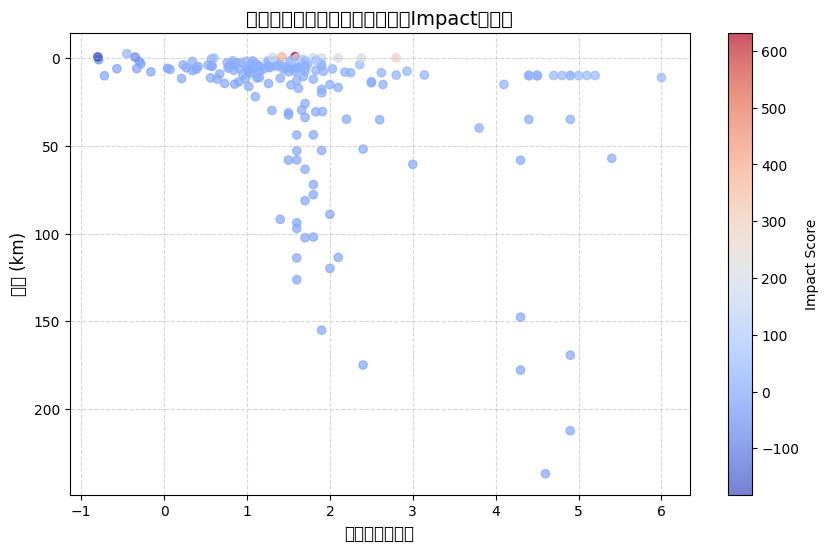

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sc = plt.scatter(df['magnitude'], df['depth'], 
                 c=df['impact_score'], cmap='coolwarm', alpha=0.7)
plt.colorbar(sc, label='Impact Score')
plt.gca().invert_yaxis()
plt.xlabel('マグニチュード', fontsize=12)
plt.ylabel('深さ (km)', fontsize=12)
plt.title('地震のマグニチュードと深さ（Impact強調）', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [9]:
import pandas as pd
import requests
import folium
from IPython.display import display

# --- 1. データ取得関数 ---
def fetch_usgs_earthquake_data(time_period='week', min_magnitude=3.0):
    """USGSのAPIから地震データを取得し、DataFrameを返します。"""
    print(f"📡 過去{time_period}の地震データを取得中...")
    url = f"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_{time_period}.geojson"
    try:
        response = requests.get(url, params={'minmagnitude': min_magnitude})
        response.raise_for_status() 
        data = response.json()
        
        earthquakes = []
        for feature in data.get('features', []):
            prop = feature.get('properties', {})
            geom = feature.get('geometry', {})
            if geom.get('coordinates'):
                lon, lat, depth = geom['coordinates']
                earthquakes.append({
                    'Magnitude': prop.get('mag'),
                    'Depth_km': depth,
                    'Latitude': lat,
                    'Longitude': lon,
                    'Time': pd.to_datetime(prop.get('time'), unit='ms'),
                    'Place': prop.get('place')
                })
        df = pd.DataFrame(earthquakes)
        print(f"✅ {len(df)}件のデータを取得しました。")
        return df
    except requests.exceptions.RequestException as e:
        print(f"❌ データ取得エラー: {e}")
        return pd.DataFrame()

# --- 2. 可視化実行 ---

# データ取得
df = fetch_usgs_earthquake_data(time_period='week', min_magnitude=3.0) 

# アジア州の範囲に限定 (経度: 50E-150E, 緯度: -10S-60N)
LON_MIN, LON_MAX = 50, 150
LAT_MIN, LAT_MAX = -10, 60

if not df.empty:
    df_asia = df[
        (df['Longitude'] >= LON_MIN) & (df['Longitude'] <= LON_MAX) &
        (df['Latitude'] >= LAT_MIN) & (df['Latitude'] <= LAT_MAX)
    ].copy()
    print(f"🌏 アジア州の地震データ: {len(df_asia)}件")
else:
    df_asia = pd.DataFrame()

if not df_asia.empty:
    # 地図の初期設定 (アジア中心)
    m = folium.Map(location=[35, 120], zoom_start=3, tiles='cartodb positron')

    # 色分け：赤=強い/危険、黄=中程度、青=小さい/安全
    def color_by_magnitude(mag):
        if mag < 4.0:
            return '#3498db'  # 青（安全）
        elif mag < 6.0:
            return '#f1c40f'  # 黄色（中程度）
        else:
            return '#e74c3c'  # 赤（危険）

    # 日本判定（地名に 'Japan' または '日本' を含む場合）
    def is_japan(place):
        if place is None:
            return False
        return ('Japan' in place) or ('日本' in place)

    # 枠線：日本は濃い青、海外はグレー
    def border_color(row):
        return '#2c3e50' if is_japan(row['Place']) else '#888888'

    # 深さに応じた線の太さ
    def style_by_depth(depth_km):
        return max(1, 15 / (depth_km + 1)) 

    print("✨ Foliumマップを生成中...")
    for _, row in df_asia.iterrows():
        marker_color = color_by_magnitude(row['Magnitude'])
        marker_weight = style_by_depth(row['Depth_km'])
        # 控えめなサイズ（繊細な表現）
        radius_size = max(2, row['Magnitude'] * 1.5)

        tooltip_text = (
            f"<b>{row['Place']}</b><br>"
            f"M{row['Magnitude']:.1f}<br>"
            f"深さ: {row['Depth_km']:.1f} km"
        )

        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=radius_size,
            color=border_color(row),
            weight=marker_weight,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            tooltip=tooltip_text
        ).add_to(m)

    # 凡例を追加（色相一貫性・プロ仕様）
    legend_html = '''
    <div style="position: fixed; bottom: 40px; left: 40px; z-index:9999; background: white; padding: 10px; border:2px solid #2c3e50; border-radius:8px;">
      <h4>地震の色分け（Magnitude）</h4>
      <p><span style="background:#3498db; border-radius:50%; width:15px; height:15px; display:inline-block; border:1px solid #888;"></span> M4未満（安全・青）</p>
      <p><span style="background:#f1c40f; border-radius:50%; width:15px; height:15px; display:inline-block; border:1px solid #888;"></span> M4〜6（中程度・黄）</p>
      <p><span style="background:#e74c3c; border-radius:50%; width:15px; height:15px; display:inline-block; border:1px solid #888;"></span> M6以上（危険・赤）</p>
      <p><span style="border:2px solid #2c3e50; border-radius:50%; width:15px; height:15px; display:inline-block;"></span> 濃青枠：日本</p>
      <p><span style="border:2px solid #888888; border-radius:50%; width:15px; height:15px; display:inline-block;"></span> 灰枠：海外</p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))

    display(m)
else:
    print("データが空のため、地図は生成されません。")


📡 過去weekの地震データを取得中...
✅ 1747件のデータを取得しました。
🌏 アジア州の地震データ: 40件
✨ Foliumマップを生成中...
✅ 1747件のデータを取得しました。
🌏 アジア州の地震データ: 40件
✨ Foliumマップを生成中...


## 📝 サマリー（200〜400字）

USGSのライブ地震データを用いて、世界中の地震の規模・深さ・発生位置を可視化した。
マグニチュードが大きく、かつ浅い地震は地表への影響が強く、「Impact Score」として数値化した。
散布図では、浅い地震ほどImpactが高いことが視覚的に確認できた。
また、地図上のプロットでは地球全体での地震分布と、特に環太平洋地域に集中する傾向を直感的に理解できた。
この分析を通じて、単なる地震情報の羅列ではなく、地球規模での“影響の可視化”が重要であると感じた。
特にデータ可視化によって、科学的な事実と人間的な感覚（インパクト）をつなぐ新しい洞察を得られた。


In [11]:
import folium
from folium.plugins import MarkerCluster

# DataFrameのカラム名を確認し、正しいカラム名を使う
# 例: 'Latitude', 'Longitude', 'Magnitude', 'Depth_km', 'Place', 'impact' など

m = folium.Map(
    location=[20, 0],
    zoom_start=2,
    tiles="CartoDB Positron"
)

cluster = MarkerCluster().add_to(m)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],  # カラム名を修正
        radius=max(2, row["Magnitude"] * 1.5),         # マグニチュードに応じたサイズ
        fill=True,
        fill_opacity=0.7,
        color=None,
        fill_color=(
            "red" if "impact" in row and row["impact"] > df["impact"].quantile(0.75) else
            "orange" if "impact" in row and row["impact"] > df["impact"].quantile(0.5) else
            "yellow"
        ) if "impact" in row else "blue",              # impactがなければ青
        popup=f"{row['Place']}<br>Mag {row['Magnitude']}, Depth {row['Depth_km']} km"
    ).add_to(cluster)

m